In [275]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.ensemble import GradientBoostingClassifier

1,2,3)

In [276]:
loans = pd.read_csv("d:/Github/Data for coursera/lending-club-data.csv")

C:\Users\Witek\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [277]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
del loans['bad_loans']

4,5,6,7,8)

In [278]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [279]:
loans = loans[features + [target]].dropna()

In [280]:
loans = pd.get_dummies(loans)

In [281]:
loans.shape

(122578, 45)

In [282]:
loans.shape

(122578, 45)

In [283]:
with open('d:/Github/Data for coursera/module-8-assignment-1-train-idx.json') as data_file:    
    train_idx = json.load(data_file)
    
with open('d:/Github/Data for coursera/module-8-assignment-1-validation-idx.json') as data_file:    
    validation_idx = json.load(data_file)

In [284]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

9)

In [285]:
label_train = train_data['safe_loans']
features_train = train_data.drop('safe_loans',1)

label_validation = validation_data['safe_loans']
features_validation = validation_data.drop('safe_loans',1)

In [286]:
model5 = GradientBoostingClassifier(n_estimators=5, max_depth=6)

In [287]:
model5.fit(features_train, label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=5, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

10,11)

In [267]:
validation_safe_loans = validation_data[validation_data['safe_loans'] == 1]
validation_risky_loans = validation_data[validation_data['safe_loans'] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

In [268]:
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [269]:
sample_prediction = model5.predict(sample_validation_data.drop('safe_loans',1))
sample_prediction

array([ 1,  1, -1,  1], dtype=int64)

In [270]:
sum(sample_validation_data["safe_loans"] == sample_prediction) / len(sample_validation_data)

0.75

12)

In [271]:
 model5.predict_proba(sample_validation_data.drop('safe_loans',1))[:,1]

array([ 0.58357669,  0.53050311,  0.46192208,  0.60408361])

13,14,15)

In [289]:
model5.score(features_validation, label_validation)

0.66146057733735464

In [296]:
val_prediction = model5.predict(features_validation)

In [297]:
conf_matrix = sklearn.metrics.confusion_matrix(label_validation,val_prediction)
conf_matrix

array([[3020, 1652],
       [1491, 3121]])

In [298]:
False_positive = conf_matrix[0,1] / len(val_prediction)
False_positive

0.17794054286945282

In [299]:
False_negative = conf_matrix[1,0] / len(val_prediction)
False_negative

0.16059887979319259

16)

In [300]:
conf_matrix[1,0] * 10000 + conf_matrix[0,1] * 20000

47950000

17,18,19)

In [303]:
validation_data["probabilities"] =  model5.predict_proba(features_validation)[:,1]

C:\Users\Witek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [304]:
validation_data.sort_values(by = ['probabilities'], ascending=False).head(n=5)

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,probabilities
8021,0.4,0,4,12.73,12.16700,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0.673059
92079,0.2,0,8,10.02,3.49357,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0.661468
68973,0.4,0,11,12.46,6.52115,0.0,1.0,1.0,1,1,...,1,0,0,0,0,0,0,0,0,0.661468
19865,1.0,0,3,14.54,2.84646,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0.661468
19954,0.8,0,5,9.24,4.74960,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0.661468


In [305]:
validation_data.sort_values(by = ['probabilities'], ascending=False).tail(n=5)

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,probabilities
84921,0.8,0,9,8.54,7.48113,0.0,1.0,2.0,0,1,...,0,0,0,0,0,1,0,0,0,0.315973
101746,0.2,0,11,11.21,4.23624,0.0,1.0,3.0,1,1,...,0,0,1,0,0,0,0,0,0,0.315973
27502,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,1,...,1,0,0,0,0,0,0,0,0,0.312806
84508,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0.307334
58794,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0.307334


20,21)

In [308]:
model10 = sklearn.ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=5)
model50 = sklearn.ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=50)
model100 = sklearn.ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=100)
model200 = sklearn.ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=200)

In [309]:
model10.fit(features_train, label_train)
model50.fit(features_train, label_train)
model100.fit(features_train, label_train)
model200.fit(features_train, label_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=200, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [311]:
print(model10.score(features_validation, label_validation))
print(model50.score(features_validation, label_validation))
print(model100.score(features_validation, label_validation))
print(model200.score(features_validation, label_validation))

0.661460577337
0.681710469625
0.690542869453
0.69043515726


22)

In [312]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [313]:
train_error_model10 = 1 - model10.score(features_train, label_train)
train_error_model50 = 1 - model50.score(features_train, label_train)
train_error_model100 = 1 - model100.score(features_train, label_train)
train_error_model200 = 1 - model200.score(features_train, label_train)

training_errors = [train_error_model10, train_error_model50, train_error_model100, train_error_model200]

In [314]:
validation_error_model10 = 1 - model10.score(features_validation, label_validation)
validation_error_model50 = 1 - model50.score(features_validation, label_validation)
validation_error_model100 = 1 - model100.score(features_validation, label_validation)
validation_error_model200 = 1 - model200.score(features_validation, label_validation)

validation_errors = [validation_error_model10, validation_error_model50, validation_error_model100, validation_error_model200]

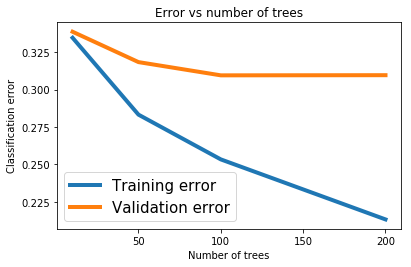

In [315]:
plt.plot([10, 50, 100, 200], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')